<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-11 23:10:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  62.0MB/s    in 3.3s    

2024-12-11 23:10:47 (61.7 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


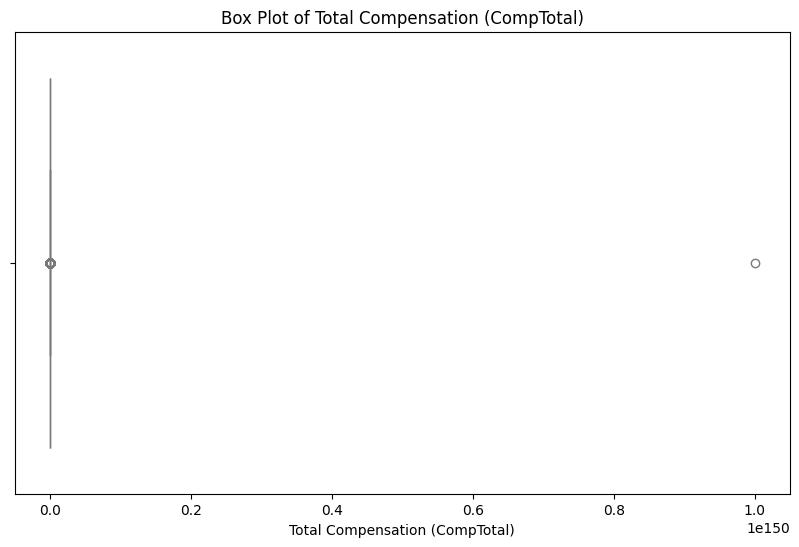

In [8]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'CompTotal' column
data_query = "SELECT CompTotal FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'CompTotal' to numeric, coercing errors to NaN (if any non-numeric values)
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Drop rows with NaN in 'CompTotal'
data_cleaned = data.dropna(subset=['CompTotal'])

# Create a box plot for 'CompTotal'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['CompTotal'], color='lightblue', fliersize=6)

# Add labels and title
plt.xlabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation (CompTotal)')

# Show the plot
plt.show()

# Close the connection
conn.close()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


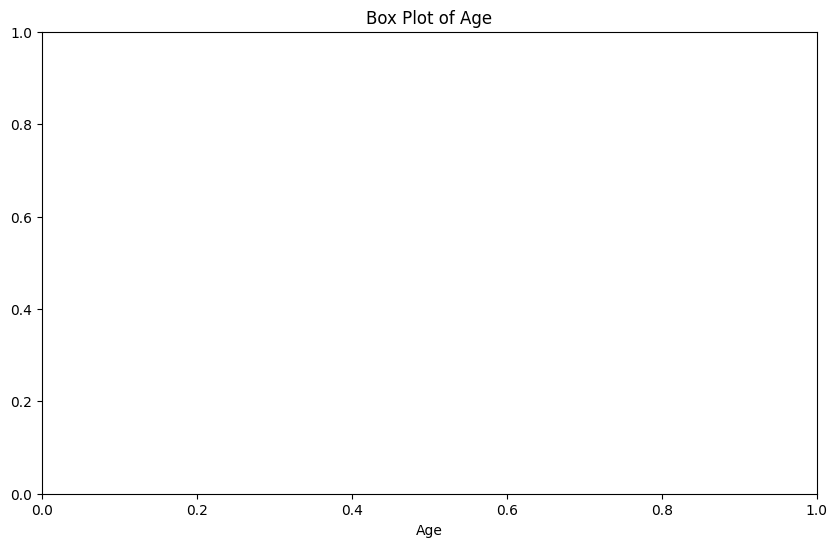

In [9]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'Age' column
data_query = "SELECT Age FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'Age' to numeric, coercing errors to NaN (if any non-numeric values)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows with NaN in 'Age'
data_cleaned = data.dropna(subset=['Age'])

# Create a box plot for 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Age'], color='lightgreen', fliersize=6)

# Add labels and title
plt.xlabel('Age')
plt.title('Box Plot of Age')

# Show the plot
plt.show()

# Close the connection
conn.close()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


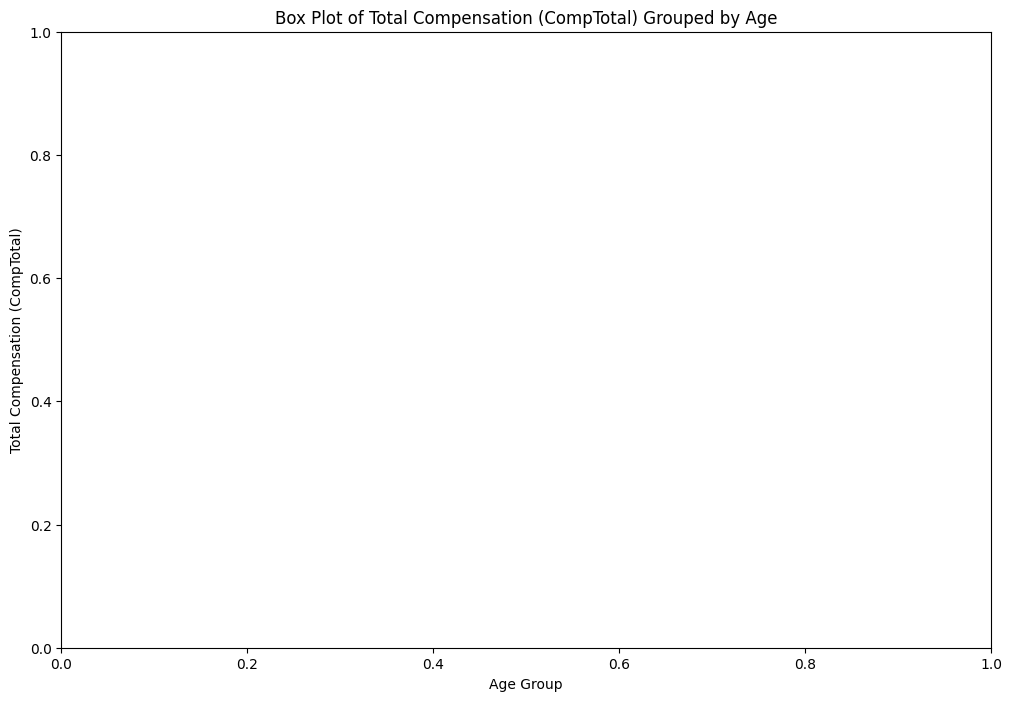

In [10]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'Age' and 'CompTotal' columns
data_query = "SELECT Age, CompTotal FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'Age' and 'CompTotal' to numeric, coercing errors to NaN (if any non-numeric values)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Drop rows with NaN in 'Age' or 'CompTotal'
data_cleaned = data.dropna(subset=['Age', 'CompTotal'])

# Define age groups (bins) and labels
bins = [20, 30, 40, 50, 60, 70]  # Define your age group ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70']  # Labels for the bins
data_cleaned['AgeGroup'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Create a box plot of 'CompTotal' grouped by 'AgeGroup'
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeGroup', y='CompTotal', data=data_cleaned, palette='Set2')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Age')

# Show the plot
plt.show()

# Close the connection
conn.close()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_1722/673941157.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=data_cleaned, palette='Set1')


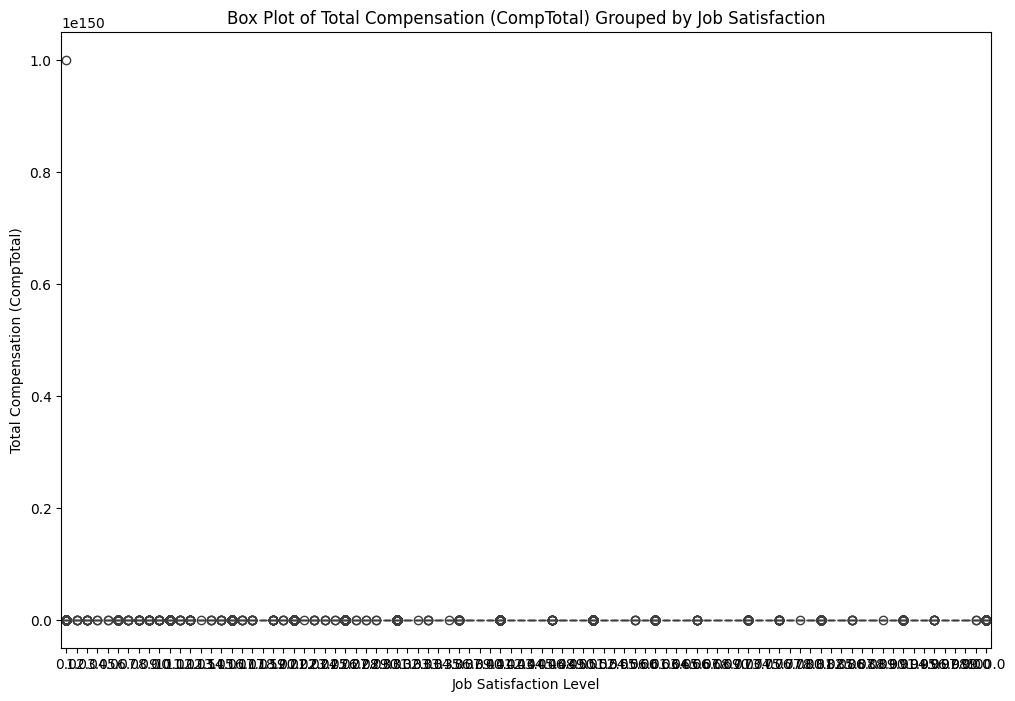

In [11]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'CompTotal' and 'JobSatPoints_6' columns
data_query = "SELECT CompTotal, JobSatPoints_6 FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'CompTotal' and 'JobSatPoints_6' to numeric, coercing errors to NaN (if any non-numeric values)
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')
data['JobSatPoints_6'] = pd.to_numeric(data['JobSatPoints_6'], errors='coerce')

# Drop rows with NaN in 'CompTotal' or 'JobSatPoints_6'
data_cleaned = data.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Create a box plot of 'CompTotal' grouped by 'JobSatPoints_6'
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=data_cleaned, palette='Set1')

# Add labels and title
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Job Satisfaction')

# Show the plot
plt.show()

# Close the connection
conn.close()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Check the available columns in the 'main' table (or the relevant table)
query = "PRAGMA table_info(main);"  # Replace 'main' with your actual table name
columns_info = pd.read_sql_query(query, conn)

# Display the columns in the table
print("Columns in the 'main' table:")
print(columns_info)

# Once you identify the correct column, replace 'DeveloperType' in the following code
# Query the data for 'ConvertedCompYearly' and the developer type column (after identifying the correct column name)
data_query = "SELECT ConvertedCompYearly, DeveloperType FROM main;"  # Replace 'DeveloperType' with the correct column name
data = pd.read_sql_query(data_query, conn)

# Convert 'ConvertedCompYearly' to numeric, coercing errors to NaN (if any non-numeric values)
data['ConvertedCompYearly'] = pd.to_numeric(data['ConvertedCompYearly'], errors='coerce')

# Drop rows with NaN in 'ConvertedCompYearly' or 'DeveloperType'
data_cleaned = data.dropna(subset=['ConvertedCompYearly', 'DeveloperType'])

# Count the number of occurrences of each DeveloperType and get the top 5
top_developer_types = data_cleaned['DeveloperType'].value_counts().head(5).index

# Filter the data for the top 5 developer roles
filtered_data = data_cleaned[data_cleaned['DeveloperType'].isin(top_developer_types)]

# Create a box plot of 'ConvertedCompYearly' grouped by 'DeveloperType'
plt.figure(figsize=(14, 8))
sns.boxplot(x='DeveloperType', y='ConvertedCompYearly', data=filtered_data, palette='Set2')

# Add labels and title
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.title('Box Plot of Yearly Compensation (ConvertedCompYearly) for Top 5 Developer Types')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Close the connection
conn.close()


Columns in the 'main' table:
     cid                 name     type  notnull dflt_value  pk
0      0           ResponseId  INTEGER        0       None   0
1      1           MainBranch     TEXT        0       None   0
2      2                  Age     TEXT        0       None   0
3      3           Employment     TEXT        0       None   0
4      4           RemoteWork     TEXT        0       None   0
..   ...                  ...      ...      ...        ...  ..
109  109      JobSatPoints_11     REAL        0       None   0
110  110         SurveyLength     TEXT        0       None   0
111  111           SurveyEase     TEXT        0       None   0
112  112  ConvertedCompYearly     REAL        0       None   0
113  113               JobSat     REAL        0       None   0

[114 rows x 6 columns]


DatabaseError: Execution failed on sql 'SELECT ConvertedCompYearly, DeveloperType FROM main;': no such column: DeveloperType

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


Columns in the 'main' table:
     cid                 name     type  notnull dflt_value  pk
0      0           ResponseId  INTEGER        0       None   0
1      1           MainBranch     TEXT        0       None   0
2      2                  Age     TEXT        0       None   0
3      3           Employment     TEXT        0       None   0
4      4           RemoteWork     TEXT        0       None   0
..   ...                  ...      ...      ...        ...  ..
109  109      JobSatPoints_11     REAL        0       None   0
110  110         SurveyLength     TEXT        0       None   0
111  111           SurveyEase     TEXT        0       None   0
112  112  ConvertedCompYearly     REAL        0       None   0
113  113               JobSat     REAL        0       None   0

[114 rows x 6 columns]


/tmp/ipykernel_1722/2492870766.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='CompTotal', data=filtered_data, palette='Set2')


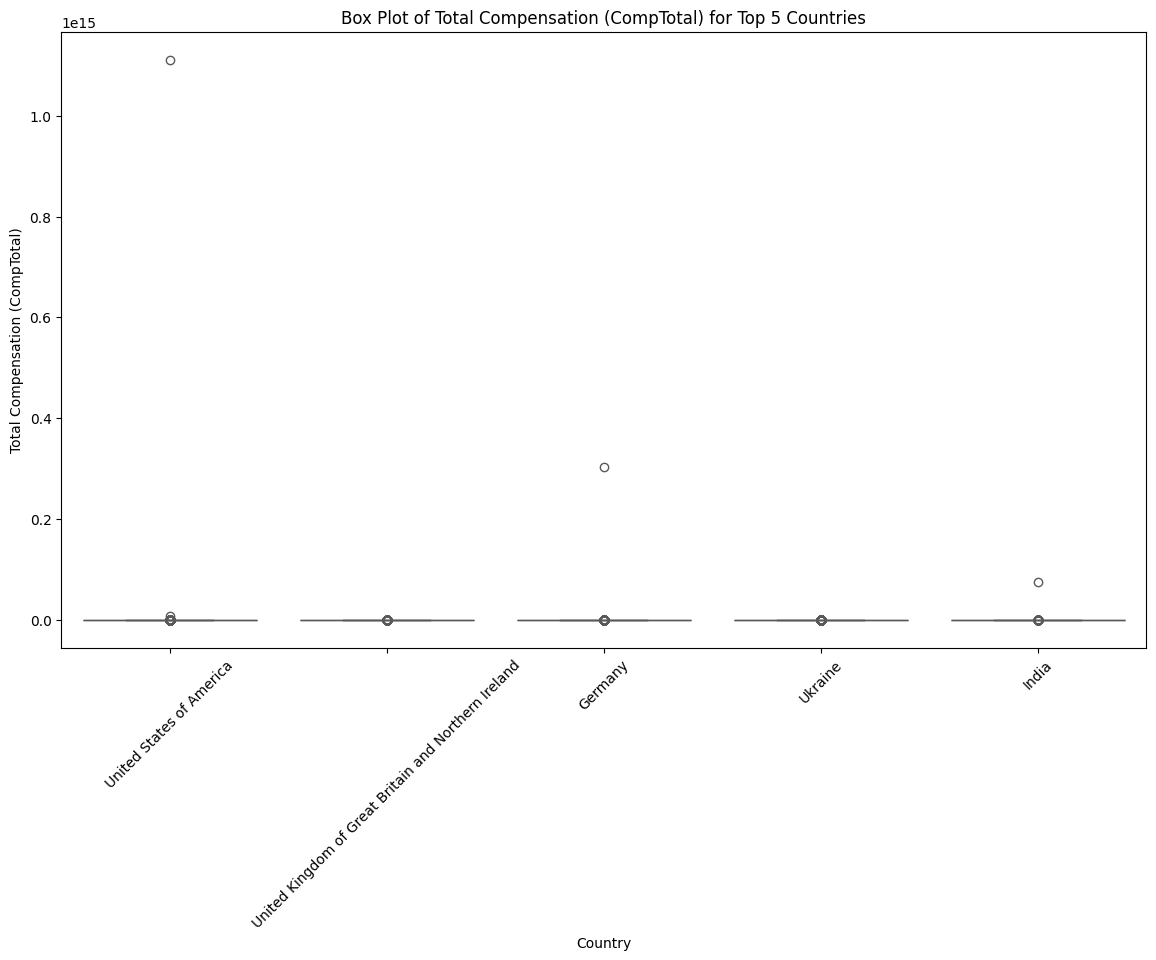

In [15]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Check the available columns in the 'main' table (or the relevant table)
query = "PRAGMA table_info(main);"  # Replace 'main' with your actual table name
columns_info = pd.read_sql_query(query, conn)

# Display the columns in the table
print("Columns in the 'main' table:")
print(columns_info)

# Once you identify the correct column, replace 'Country' in the following code
# Query the data for 'CompTotal' and 'Country' columns (after identifying the correct column name)
data_query = "SELECT CompTotal, Country FROM main;"  # Replace 'Country' with the correct column name
data = pd.read_sql_query(data_query, conn)

# Convert 'CompTotal' to numeric, coercing errors to NaN (if any non-numeric values)
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Drop rows with NaN in 'CompTotal' or 'Country'
data_cleaned = data.dropna(subset=['CompTotal', 'Country'])

# Count the number of occurrences of each country and get the top 5
top_countries = data_cleaned['Country'].value_counts().head(5).index

# Filter the data for the top 5 countries
filtered_data = data_cleaned[data_cleaned['Country'].isin(top_countries)]

# Create a box plot of 'CompTotal' grouped by 'Country'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='CompTotal', data=filtered_data, palette='Set2')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation (CompTotal) for Top 5 Countries')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Close the connection
conn.close()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [16]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Check the available columns in the 'main' table (or the relevant table)
query = "PRAGMA table_info(main);"  # Replace 'main' with your actual table name
columns_info = pd.read_sql_query(query, conn)

# Display the columns in the table
print("Columns in the 'main' table:")
print(columns_info)

# Once you identify the correct column, replace 'EmploymentType' in the following code
# Query the data for 'CompTotal' and 'EmploymentType' columns (after identifying the correct column name)
data_query = "SELECT CompTotal, EmploymentType FROM main;"  # Replace 'EmploymentType' with the correct column name
data = pd.read_sql_query(data_query, conn)

# Convert 'CompTotal' to numeric, coercing errors to NaN (if any non-numeric values)
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Drop rows with NaN in 'CompTotal' or 'EmploymentType'
data_cleaned = data.dropna(subset=['CompTotal', 'EmploymentType'])

# Create a box plot of 'CompTotal' grouped by 'EmploymentType'
plt.figure(figsize=(14, 8))
sns.boxplot(x='EmploymentType', y='CompTotal', data=data_cleaned, palette='Set2')

# Add labels and title
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation (CompTotal) Across Employment Types')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Close the connection
conn.close()


Columns in the 'main' table:
     cid                 name     type  notnull dflt_value  pk
0      0           ResponseId  INTEGER        0       None   0
1      1           MainBranch     TEXT        0       None   0
2      2                  Age     TEXT        0       None   0
3      3           Employment     TEXT        0       None   0
4      4           RemoteWork     TEXT        0       None   0
..   ...                  ...      ...      ...        ...  ..
109  109      JobSatPoints_11     REAL        0       None   0
110  110         SurveyLength     TEXT        0       None   0
111  111           SurveyEase     TEXT        0       None   0
112  112  ConvertedCompYearly     REAL        0       None   0
113  113               JobSat     REAL        0       None   0

[114 rows x 6 columns]


DatabaseError: Execution failed on sql 'SELECT CompTotal, EmploymentType FROM main;': no such column: EmploymentType

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


Columns in the 'main' table:
     cid                 name     type  notnull dflt_value  pk
0      0           ResponseId  INTEGER        0       None   0
1      1           MainBranch     TEXT        0       None   0
2      2                  Age     TEXT        0       None   0
3      3           Employment     TEXT        0       None   0
4      4           RemoteWork     TEXT        0       None   0
..   ...                  ...      ...      ...        ...  ..
109  109      JobSatPoints_11     REAL        0       None   0
110  110         SurveyLength     TEXT        0       None   0
111  111           SurveyEase     TEXT        0       None   0
112  112  ConvertedCompYearly     REAL        0       None   0
113  113               JobSat     REAL        0       None   0

[114 rows x 6 columns]


/tmp/ipykernel_1722/3356539766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=data_cleaned, palette='Set2')


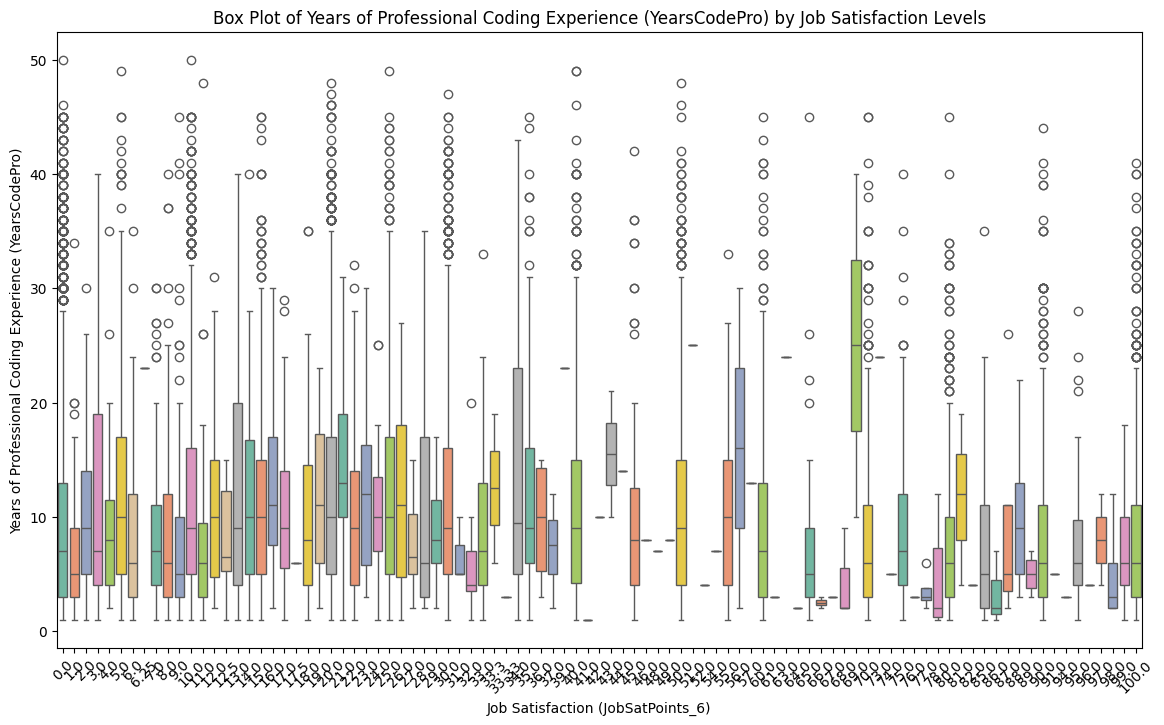

In [17]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Check the available columns in the 'main' table (or the relevant table)
query = "PRAGMA table_info(main);"  # Replace 'main' with your actual table name
columns_info = pd.read_sql_query(query, conn)

# Display the columns in the table
print("Columns in the 'main' table:")
print(columns_info)

# Once you identify the correct column names, replace 'YearsCodePro' and 'JobSatPoints_6'
# Query the data for 'YearsCodePro' and 'JobSatPoints_6' columns
data_query = "SELECT YearsCodePro, JobSatPoints_6 FROM main;"  # Replace 'JobSatPoints_6' with the correct column name
data = pd.read_sql_query(data_query, conn)

# Convert 'YearsCodePro' to numeric, coercing errors to NaN (if any non-numeric values)
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

# Drop rows with NaN in 'YearsCodePro' or 'JobSatPoints_6'
data_cleaned = data.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Create a box plot of 'YearsCodePro' grouped by 'JobSatPoints_6'
plt.figure(figsize=(14, 8))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=data_cleaned, palette='Set2')

# Add labels and title
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience (YearsCodePro)')
plt.title('Box Plot of Years of Professional Coding Experience (YearsCodePro) by Job Satisfaction Levels')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Close the connection
conn.close()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [18]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
